In [43]:
library(survival)
library(tidyverse)
library(repr)

options(jupyter.plot_mimetypes = "image/svg+xml")
options(repr.plot.width = 9, repr.plot.height = 6, repr.plot.res = 100)

In [5]:
activities <- read_csv('../csv/ACTIVITY.csv')

Rows: 185084 Columns: 17

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): CustomerVendorName, JobName, ContactType, ActivityUser, Outcome, A...
dbl  (7): ObjectID, ReferenceNumber, JobNumber, StatementRequestObjectID, St...
dttm (1): CreatedDate


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [12]:
# succeed first shot
activities %>%
  filter(StopTime == 0) %>%
  count(Outcome, name = "Counts", sort = TRUE)

Outcome,Counts
<chr>,<int>
Statement Received,4687


In [45]:
activities %>%
  filter(StopTime != 0) -> activity

In [17]:
ContactType.labels <- c(
  "N/A",
  "Fax",
  "Call",
  "Client Email",
  "Email"
)

ActivityType.labels <- c(
  "N/A",
  "Call / Email",
  "Note Only",
  "Called Vendor"
)

User.labels<- c(
  "N/A",
  "OnBase"
)

Created.labels <- c(
  "N/A",
  "WORKFLOW"
)

In [46]:
activity %>%
  mutate(
    ContactType = factor(ContactType, labels = ContactType.labels),
    ActivityType = factor(ActivityType, labels = ActivityType.labels),
    User = factor(User, labels = User.labels),
    Created = factor(Created, labels = Created.labels)
  ) -> activity

head(activity)

ObjectID,CreatedDate,ReferenceNumber,CustomerVendorName,JobNumber,JobName,ContactType,ActivityUser,Outcome,ActivityType,StatementRequestObjectID,CreatedBy,StartTime,StopTime,Event,Created,User
<dbl>,<dttm>,<dbl>,<chr>,<dbl>,<chr>,<fct>,<chr>,<chr>,<fct>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
28838280,2020-11-04 17:49:01,1239383,FIRETROL PROTECTION SYSTEMS IN,3285,Community Health Systems - 3285,Email,ykahssai,N/A,Call / Email,26000348,ASIBLEY,0,8878433,0,N/A,N/A
31342623,2021-02-15 12:02:54,1239383,FIRETROL PROTECTION SYSTEMS IN,3285,Community Health Systems - 3285,N/A,Yodit Kahssai,Left Voicemail,Call / Email,26000348,SVC_WORKFLOW,8878433,9650390,0,WORKFLOW,N/A
31800505,2021-02-24 10:28:51,1239383,FIRETROL PROTECTION SYSTEMS IN,3285,Community Health Systems - 3285,N/A,Yodit Kahssai,Will Email or Fax,Call / Email,26000348,SVC_WORKFLOW,9650390,9816154,0,WORKFLOW,N/A
31852477,2021-02-26 08:31:35,1239383,FIRETROL PROTECTION SYSTEMS IN,3285,Community Health Systems - 3285,Email,OnBase Processing Service,Statement Received,Call / Email,26000348,SVC_WORKFLOW,9816154,9816154,1,WORKFLOW,OnBase
31091947,2021-02-01 15:50:34,1191988,STERIS CORPORATION,3022,Hartford - 3022,Email,Joe Vig,N/A,Call / Email,26876481,JVIG,0,1799616,0,N/A,N/A
31653279,2021-02-22 11:44:10,1191988,STERIS CORPORATION,3022,Hartford - 3022,Email,Joe Vig,N/A,Call / Email,26876481,JVIG,1799616,10606706,0,N/A,N/A


In [21]:
fit.coxph <- coxph(
  Surv(StartTime, Event) ~ ContactType + ActivityType + Created + User,
  data = activity
)

Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  5 ; coefficient may be infinite. ”


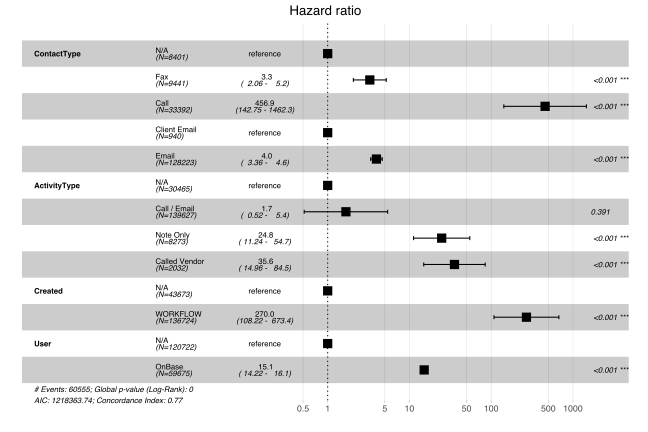

In [44]:
survminer::ggforest(model = fit.coxph, data = activity)